📊 Sales Summary:
       product  total_qty  revenue
0  Conditioner          3    270.0
1    Face Wash         11    660.0
2      Shampoo          7    560.0
3         Soap         25    625.0
4   Toothpaste         13    520.0


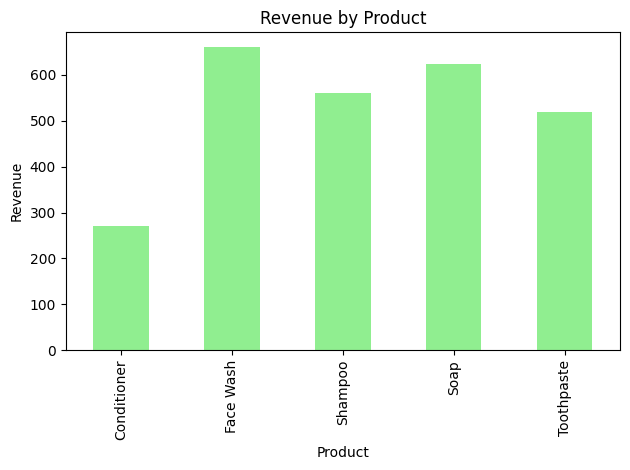

In [1]:
# Step 1: Import necessary libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Create a new SQLite database in memory
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Step 3: Create a table and insert sample data
cursor.execute('''
CREATE TABLE sales (
    product TEXT,
    quantity INTEGER,
    price REAL
)
''')

sample_data = [
    ("Soap", 10, 25),
    ("Shampoo", 5, 80),
    ("Soap", 15, 25),
    ("Toothpaste", 8, 40),
    ("Shampoo", 2, 80),
    ("Face Wash", 7, 60),
    ("Toothpaste", 5, 40),
    ("Conditioner", 3, 90),
    ("Face Wash", 4, 60)
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()

# Step 4: SQL Query to get total quantity and revenue
query = '''
SELECT
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
'''

df = pd.read_sql_query(query, conn)

# Step 5: Print the results
print("📊 Sales Summary:")
print(df)

# Step 6: Plot the revenue bar chart
df.plot(kind='bar', x='product', y='revenue', color='lightgreen', legend=False)
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()

# Step 7: Save the database file for download
conn.close()
